In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import scipy as sp
from ipumspy import readers, ddi

In [3]:
included_rows = [
    0, # WL_ORG - Organ type
    54, # INIT_AGE - Initial age of recipient at listing
    61, # INIT_DATE - Initial date of recipient listing
    24, # GENDER - Recipient gender
    63, # ETHCAT - Recipient ethnicity
    385, # HGT_CM_CALC - Recipient height (cm)
    386, # WGT_KG_CALC - Recipient weight (kg)
    33, # EDUCATION - Recipient highest education at listing
    32, # PERM_STATE - Recipient state of residency
    31, # CITIZEN_COUNTRY - Recipient country of residency
    103, # PRI_PAYMENT_TCR_KI - Recipient primary projected payment source at listing
    6, # CREAT_CLEAR - Recipient CrCl at listing
    7, # GFR - Recipient GFR at listing
    25, # ABO - Recipient ABO blood type
    17,18,19,20,21,22,81,82,83,84,85,86,87,88,89,90,91,92, # A1,A2,B1,B2,DR1,DR2,BW4,BW6,C1,C2,DR51,DR51_2,DR52,DR52_2,DR53,DR53_2,DQB1,DQB2
    37, # DIAB - Recipient diabetes at listing
    8, # DONATION - Receives allocation points for previously donating an organ
    2, # NUM_PREV_TX - Recipient number of previous transplants
    47, # INIT_CPRA - Recipient CPRA at listing
    48, # END_CPRA - Recipient most recent CPRA
    58, # DIALYSIS_DATE - Date recipient started regular dialysis for ESRD
    118, # TX_DATE - Transplant date
    68, # COMPOSITE_DEATH_DATE - Death date
    67, # DAYSWAIT_ALLOC - official waiting time for allocation priority as measured by the OPTN standards
]
kidpan_data = pd.read_csv(
    "C:/Users/brand/Desktop/STAR_Delimited/Delimited Text File 202312/Kidney_ Pancreas_ Kidney-Pancreas/KIDPAN_DATA.DAT",
    sep="\t",
    usecols=included_rows
)
colnames = pd.read_csv(
    "C:/Users/brand/Desktop/STAR_Delimited/Analysis/KIDPAN_DATA_colnames.csv",
    sep=",",
    header=0,
    skiprows=lambda x : x-1 not in included_rows + [-1]
)
kidpan_data.columns = list(colnames["LABEL"])
kidpan_data = kidpan_data[kidpan_data["WL_ORG"] == "KI"]

C:\Users\brand\AppData\Local\Temp\ipykernel_2404\580209939.py:27: DtypeWarning: Columns (2,8,17,18,19,20,21,22,31,33,37,47,48,54,67,81,82,83,84,85,86,87,88,89,90,91,92,103,385,386) have mixed types. Specify dtype option on import or set low_memory=False.
  kidpan_data = pd.read_csv(


In [4]:
kidpan_data = kidpan_data.replace(".", np.nan)

In [5]:
kidpan_data.columns

Index(['WL_ORG', 'NUM_PREV_TX', 'CREAT_CLEAR', 'GFR', 'DONATION', 'A1', 'A2',
       'B1', 'B2', 'DR1', 'DR2', 'GENDER', 'ABO', 'CITIZEN_COUNTRY',
       'PERM_STATE', 'EDUCATION', 'DIAB', 'INIT_CPRA', 'END_CPRA', 'INIT_AGE',
       'DIALYSIS_DATE', 'INIT_DATE', 'ETHCAT', 'DAYSWAIT_ALLOC',
       'COMPOSITE_DEATH_DATE', 'BW4', 'BW6', 'C1', 'C2', 'DR51', 'DR51_2',
       'DR52', 'DR52_2', 'DR53', 'DR53_2', 'DQ1', 'DQ2', 'PRI_PAYMENT_TCR_KI',
       'TX_DATE', 'HGT_CM_CALC', 'WGT_KG_CALC'],
      dtype='object')

In [10]:
# refactor columns into correct formats
kidpan_data["INIT_AGE"] = kidpan_data["INIT_AGE"].astype(float)
for date_column in ["INIT_DATE", "DIALYSIS_DATE", "TX_DATE", "COMPOSITE_DEATH_DATE"]:
    kidpan_data[date_column] = pd.to_datetime(kidpan_data[date_column].replace(".", np.nan))
for hla_column in ["A1", "A2", "B1", "B2", "DR1", "DR2", "BW4", "BW6", "C1", "C2", "DR51", "DR51_2", "DR52", "DR52_2", "DR53", "DR53_2", "DQ1", "DQ2"]:
    kidpan_data[hla_column] = kidpan_data[hla_column].astype(float).replace(97, np.nan).replace(99, np.nan)

In [11]:
kidpan_data = kidpan_data[kidpan_data["INIT_DATE"].dt.year >= 2013]

In [12]:
for column in kidpan_data.columns:
    print(f"{column.ljust(20, ' ')} : {np.round(np.sum(kidpan_data[column].isna()) / kidpan_data.shape[0], 3)}")

WL_ORG               : 0.0
NUM_PREV_TX          : 0.0
CREAT_CLEAR          : 0.981
GFR                  : 0.536
DONATION             : 0.0
A1                   : 0.0
A2                   : 0.0
B1                   : 0.0
B2                   : 0.0
DR1                  : 0.0
DR2                  : 0.0
GENDER               : 0.0
ABO                  : 0.0
CITIZEN_COUNTRY      : 0.989
PERM_STATE           : 0.002
EDUCATION            : 0.006
DIAB                 : 0.0
INIT_CPRA            : 0.085
END_CPRA             : 0.174
INIT_AGE             : 0.0
DIALYSIS_DATE        : 0.262
INIT_DATE            : 0.0
ETHCAT               : 0.0
DAYSWAIT_ALLOC       : 0.015
COMPOSITE_DEATH_DATE : 0.8
BW4                  : 0.0
BW6                  : 0.0
C1                   : 0.0
C2                   : 0.0
DR51                 : 0.015
DR51_2               : 0.005
DR52                 : 0.014
DR52_2               : 0.005
DR53                 : 0.014
DR53_2               : 0.005
DQ1                  : 0.

```
Columns missing too much (>60%):
CREAT_CLEAR          : 0.958
GFR                  : 0.68
CITIZEN_COUNTRY      : 0.995
HGT_CM_CALC          : 0.508
WGT_KG_CALC          : 0.504

Recalculate:
DAYSWAIT_ALLOC       : 0.166

Fill out unfilled with null values:
DONATION             : 0.056
DIAB                 : 0.095
DIALYSIS_DATE        : 0.402
COMPOSITE_DEATH_DATE : 0.559
PRI_PAYMENT_TCR_KI   : 0.098
TX_DATE              : 0.499

Exclude missing values:
PERM_STATE           : 0.018
EDUCATION            : 0.098
```

In [13]:
kidpan_data["INIT_DATE_SINCE_FIRST"] = (kidpan_data["INIT_DATE"] - kidpan_data["INIT_DATE"].min()).dt.days / 365
kidpan_data["DIALYSIS_DATE_SINCE_FIRST"] = (kidpan_data["DIALYSIS_DATE"] - kidpan_data["INIT_DATE"].min()).dt.days / 365
two_date_model = smf.ols(formula="INIT_DATE_SINCE_FIRST ~ DIALYSIS_DATE_SINCE_FIRST", data=kidpan_data, missing="drop")
results = two_date_model.fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     INIT_DATE_SINCE_FIRST   R-squared:                       0.531
Model:                               OLS   Adj. R-squared:                  0.531
Method:                    Least Squares   F-statistic:                 3.698e+05
Date:                   Sun, 07 Apr 2024   Prob (F-statistic):               0.00
Time:                           22:38:22   Log-Likelihood:            -7.1699e+05
No. Observations:                 326086   AIC:                         1.434e+06
Df Residuals:                     326084   BIC:                         1.434e+06
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

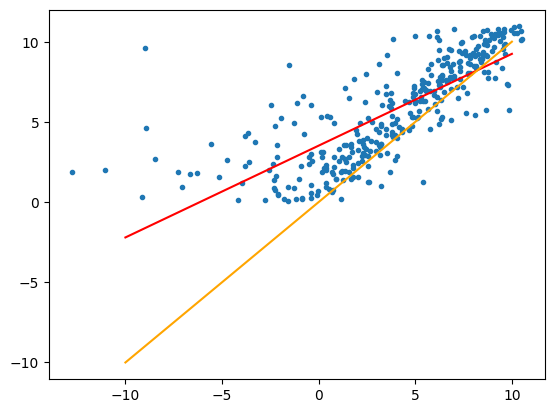

In [44]:
random_selection = np.random.uniform(0,1,size=kidpan_data.shape[0]) < 0.001
plt.scatter(kidpan_data["DIALYSIS_DATE_SINCE_FIRST"][random_selection], kidpan_data["INIT_DATE_SINCE_FIRST"][random_selection], marker=".")
plt.plot(np.linspace(-10,10,100), 0.5723*np.linspace(-10,10,100)+3.5186, color="r")
plt.plot(np.linspace(-10,10,100), np.linspace(-10,10,100), color="orange")

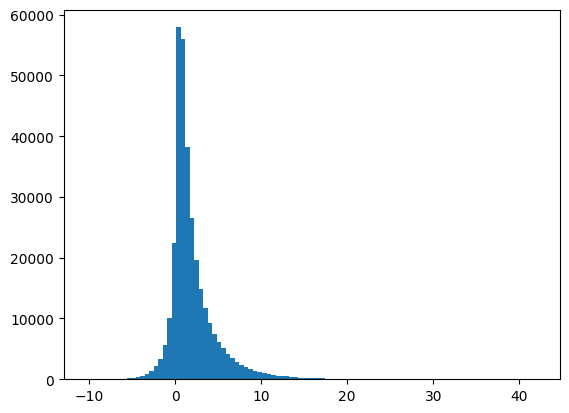

In [49]:
plt.hist(kidpan_data["INIT_DATE_SINCE_FIRST"] - kidpan_data["DIALYSIS_DATE_SINCE_FIRST"], bins=100)
plt.show()